In [9]:
import cameratransform
import drawSvg as draw
from math import sin, cos, pi
import numpy as np
from opensimplex import OpenSimplex

In [104]:
def linear_spin_gen(dtheta):
    curr = 0
    while True:
        yield curr
        curr += dtheta
        
def sinusoid_spin_gen(freq, amp, use_sin=False):
    curr = 0
    while True:
        if not use_sin:
            yield 2*pi*amp * cos(curr/freq * 2*pi)
        else:
            yield 2*pi*amp * sin(curr/freq * 2*pi)
        curr += 1

def spin(start=5, end=240, spin_gen=linear_spin_gen(0.0015), step_size=3, n=720, noise_coeff=1, noise_r=8, 
         noise_coeff2=0, noise_r2=0, reversed=False,seed=123,scale=.5, hwidth=1):
    gen = OpenSimplex(seed=seed)
    canvas = draw.Drawing(1000, 1000, origin='center', displayInline=False)
    
    canvas.append(draw.Rectangle(-500, -500, 1000, 1000, fill="white"))
    noise_coords = [(noise_r * cos(theta), noise_r * sin(theta)) for theta in np.arange(0, 2*pi, 2*pi/n)]
    stuff = []
    for i, xy in enumerate(noise_coords):
        x,y = xy
        noise = gen.noise2d(x,y)
        if not i:
            print(noise)
        r = 1 + noise_coeff * noise
        theta = i/n*2*pi
        x2,y2 = noise_r2*cos(theta),noise_r2*sin(theta)
        r += noise_coeff2 * gen.noise2d(x2, y2) * noise
        stuff.append((r,theta))
    curr=start
    while curr < end:
        curr_spin = next(spin_gen)
        if reversed:
            curr_spin *= -1
        line = []
        skip_rate=1
        if curr < 5:
            skip_rate = int(n/40) or 1
        elif curr < 10:
            skip_rate = int(n/80) or 1
        i = -1
        for r,theta in stuff:
            i+=1
            if i % skip_rate:
                continue
            r *= curr
            theta = (theta + curr_spin) % (2*pi)
            line.extend([
                r*cos(theta),
                r*sin(theta)
            ])
        canvas.append(draw.Lines(*line, close=True, fill='none',stroke='black',stroke_width=hwidth))
        curr += step_size
    canvas.setPixelScale(scale)
    display(canvas.rasterize())
    

0.4660552713279593


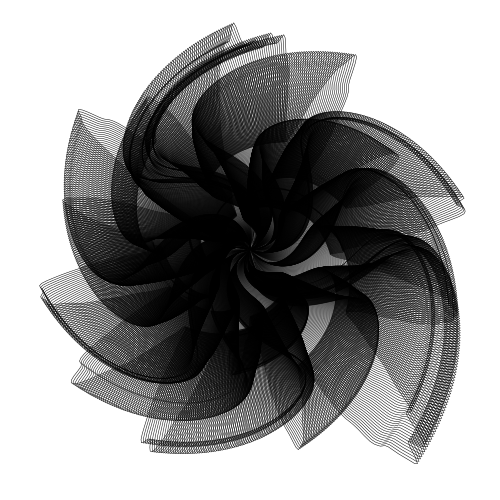

In [105]:
spin(step_size=1,start=1,end=300,spin_gen=sinusoid_spin_gen(360, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
     noise_r2=30, reversed=True)

0.4660552713279593


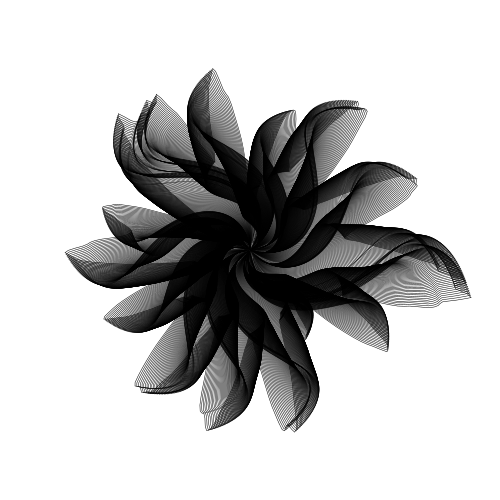

In [93]:
spin(step_size=1.2,start=1,end=250,spin_gen=sinusoid_spin_gen(324, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
     noise_r2=30, seed=123, reversed=True,n=500)

0.4660552713279593


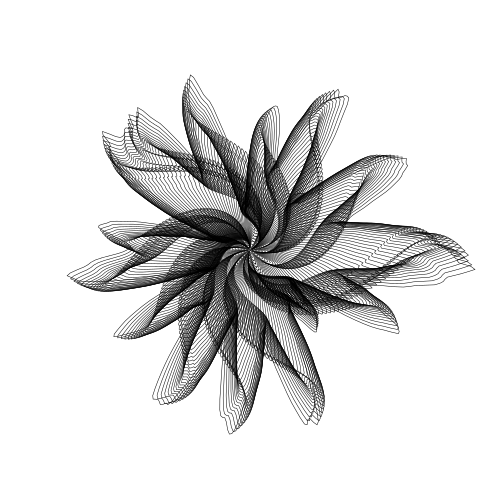

In [94]:
spin(step_size=4,start=1,end=250,spin_gen=sinusoid_spin_gen(105, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
     noise_r2=30, seed=123, reversed=True,n=500)

-0.3296893110208067


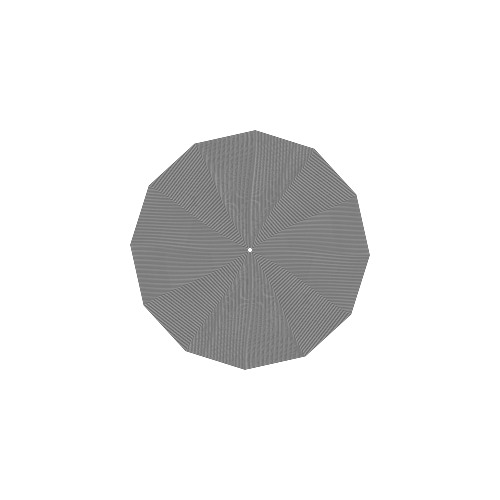

In [95]:
spin(step_size=2,spin_gen=sinusoid_spin_gen(200, .008), noise_coeff=0, n=12)

-0.3296893110208067


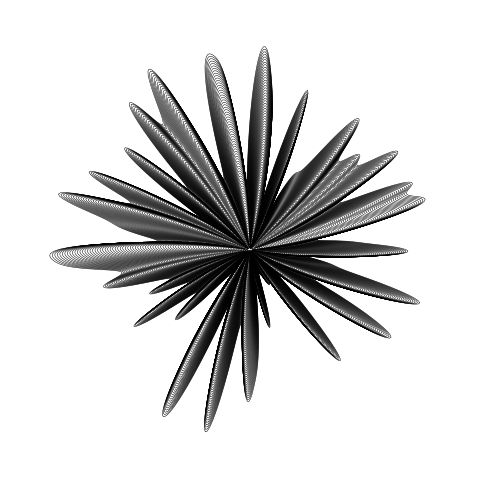

In [96]:
spin()

-0.3296893110208067


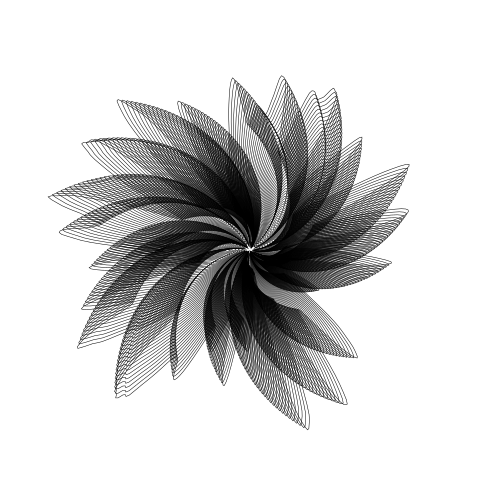

In [97]:
spin(start=10, step_size=4, spin_gen=linear_spin_gen(0.016), noise_coeff2=0.1, noise_r2=40)
pass

0
-0.5335704432286428


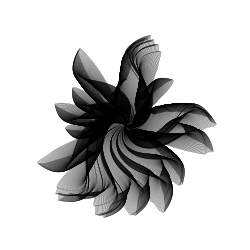

1
0.5625055169003642


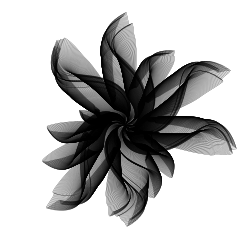

2
0.5625055169003642


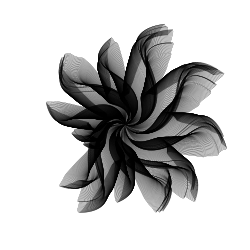

3
0.22415404601214226


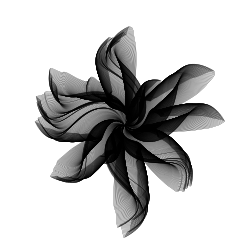

4
0.40961165208760275


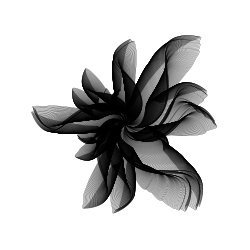

5
-0.11458523056848272


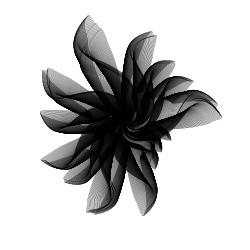

6
-0.15980217487155204


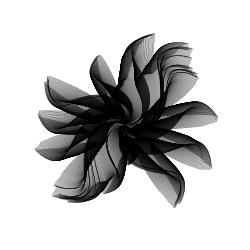

7
0.5172885725972948


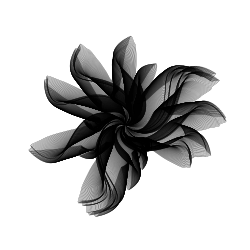

8
-0.2916692179128255


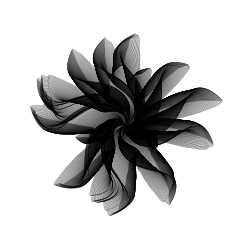

9
-0.477126823988286


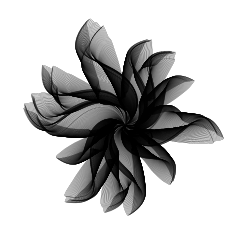

10
0.4739635232281929


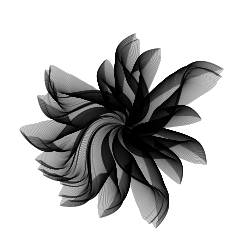

11
-0.26273414424110403


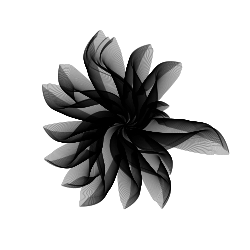

12
0.5093803206970614


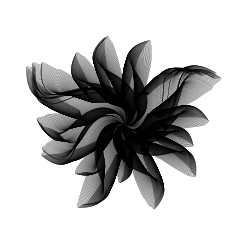

13
-0.2385440217095227


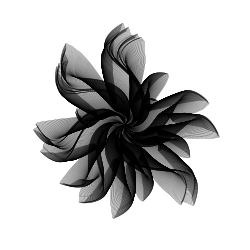

14
0.20312722424065424


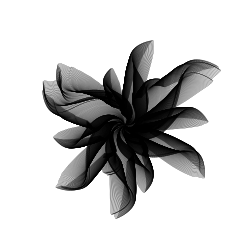

15
-0.1756186786720188


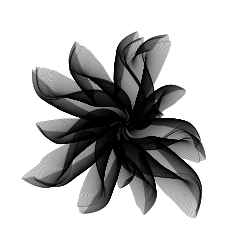

16
0.2062905250007472


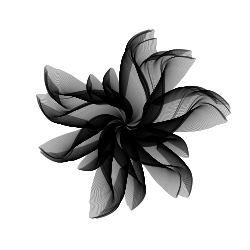

17
0.538315394368783


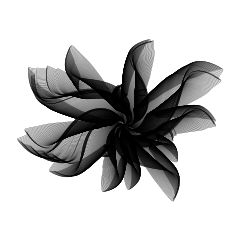

18
0.267479095381244


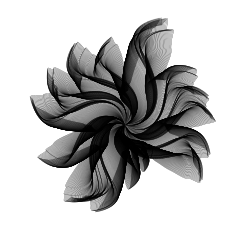

19
0.41435660322774276


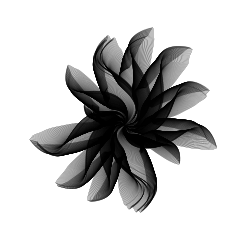

20
0.17893710170907248


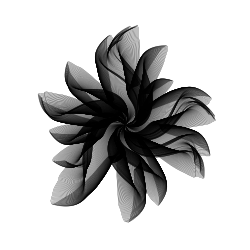

21
-0.2385440217095227


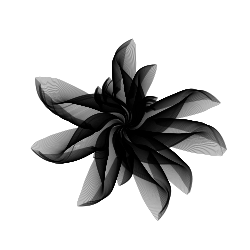

22
0.1387753531000641


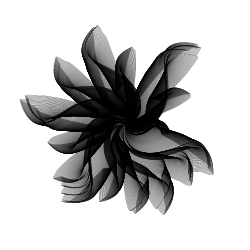

23
-0.4385467257593242


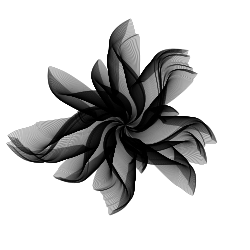

24
-0.47396352322819285


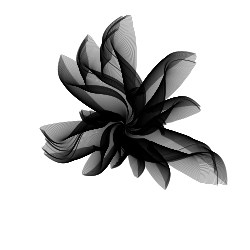

25
-0.5093803206970614


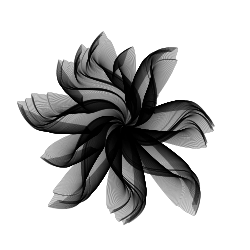

26
-0.2062905250007472


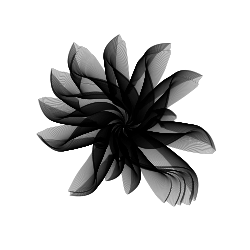

27
0.26273414424110403


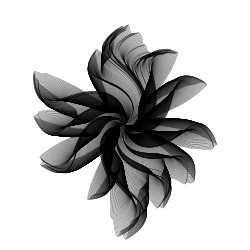

28
0.40961165208760275


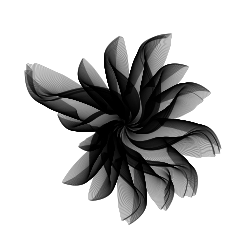

29
0.538315394368783


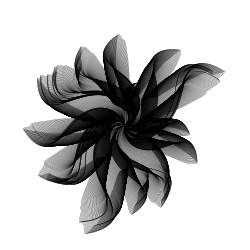

30
0.49815364575977406


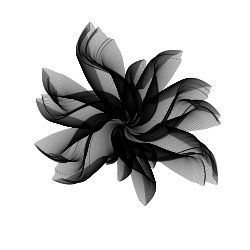

31
-0.5656688176604575


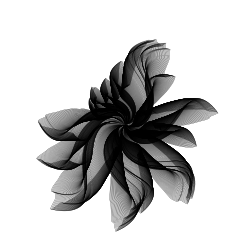

32
-0.17893710170907282


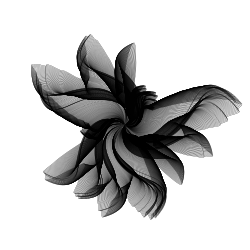

33
0.4064483513275094


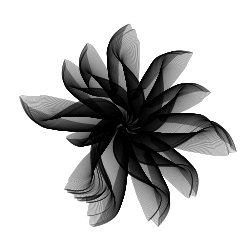

34
0.182100402469166


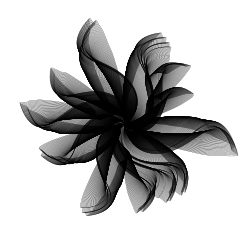

35
0.38542152955602144


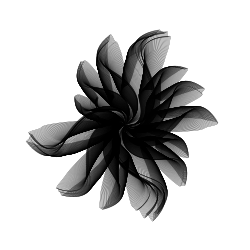

36
-0.20312722424065421


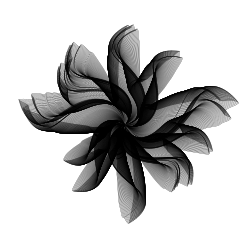

37
0.47396352322819285


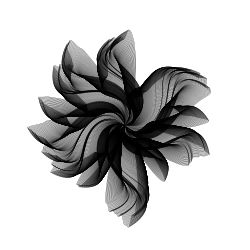

38
0.23206229791237537


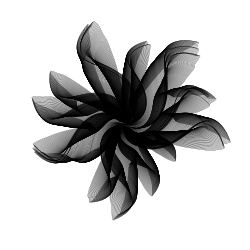

39
-0.40644835132750956


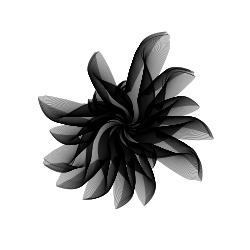

40
0.41751990398783606


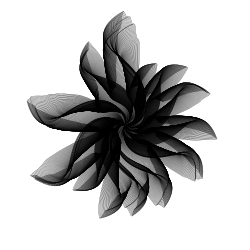

41
0.47396352322819274


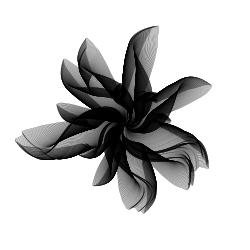

42
0.2706423961413373


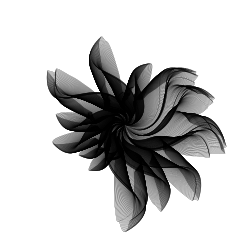

43
0.14668360500029745


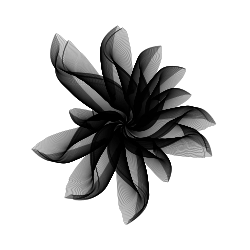

44
-0.11458523056848256


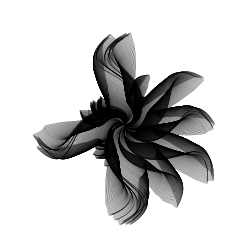

45
-0.4708002224680996


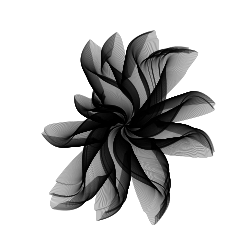

46
-0.17561867867201894


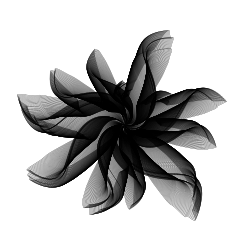

47
-0.13561205233997065


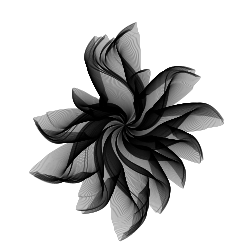

48
-0.1466836050002973


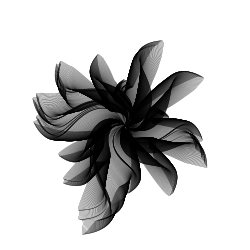

49
-0.25957084348101067


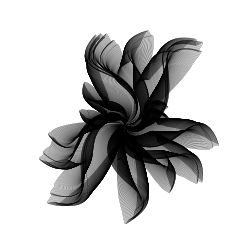

50
-0.2062905250007472


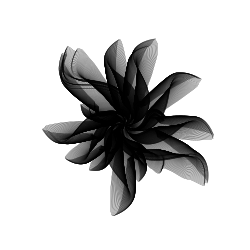

51
0.20312722424065402


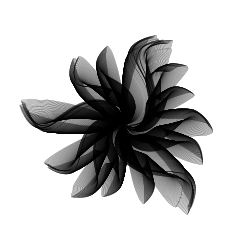

52
0.5383153943687827


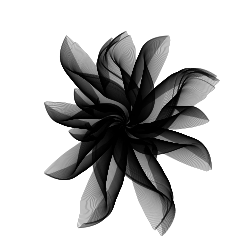

53
-0.4739635232281927


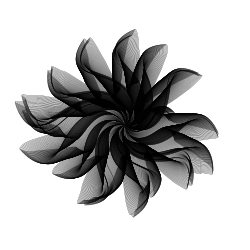

54
-0.5625055169003642


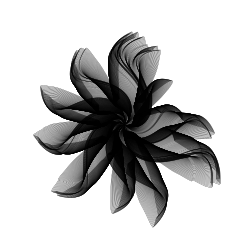

55
-0.47396352322819274


KeyboardInterrupt: 

In [103]:
for seed in range(100):
    print(seed)
    spin(step_size=1.2,start=1,end=250,spin_gen=sinusoid_spin_gen(324, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
     noise_r2=30, seed=seed, reversed=True,n=500,scale=.25)

0.17893710170907248


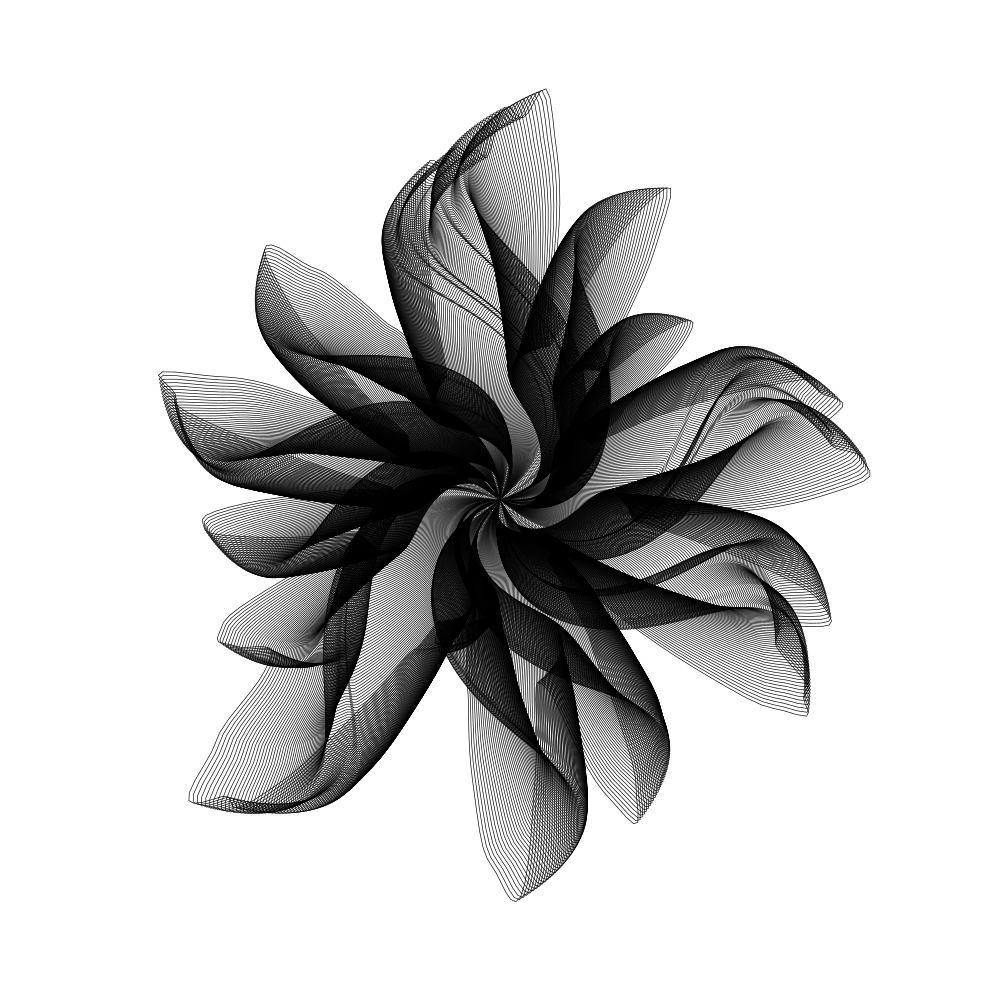

In [99]:
spin(step_size=1.2,start=1,end=250,spin_gen=sinusoid_spin_gen(324, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
 noise_r2=20, seed=20, reversed=True,n=500, scale=1, hwidth=.65)

-0.26273414424110414


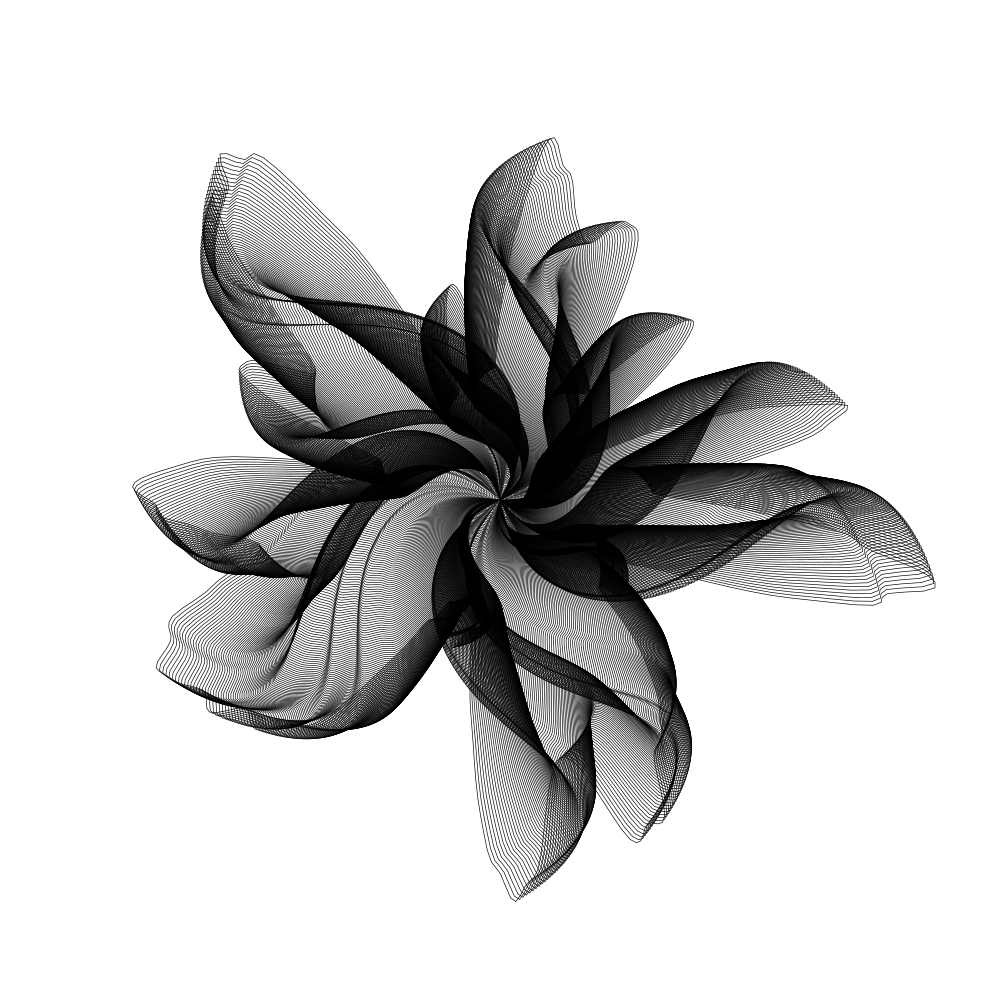

In [100]:
spin(step_size=1.2,start=1,end=250,spin_gen=sinusoid_spin_gen(324, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
 noise_r2=20, seed=59, reversed=True,n=500, scale=1, hwidth=.65)

0.182100402469166


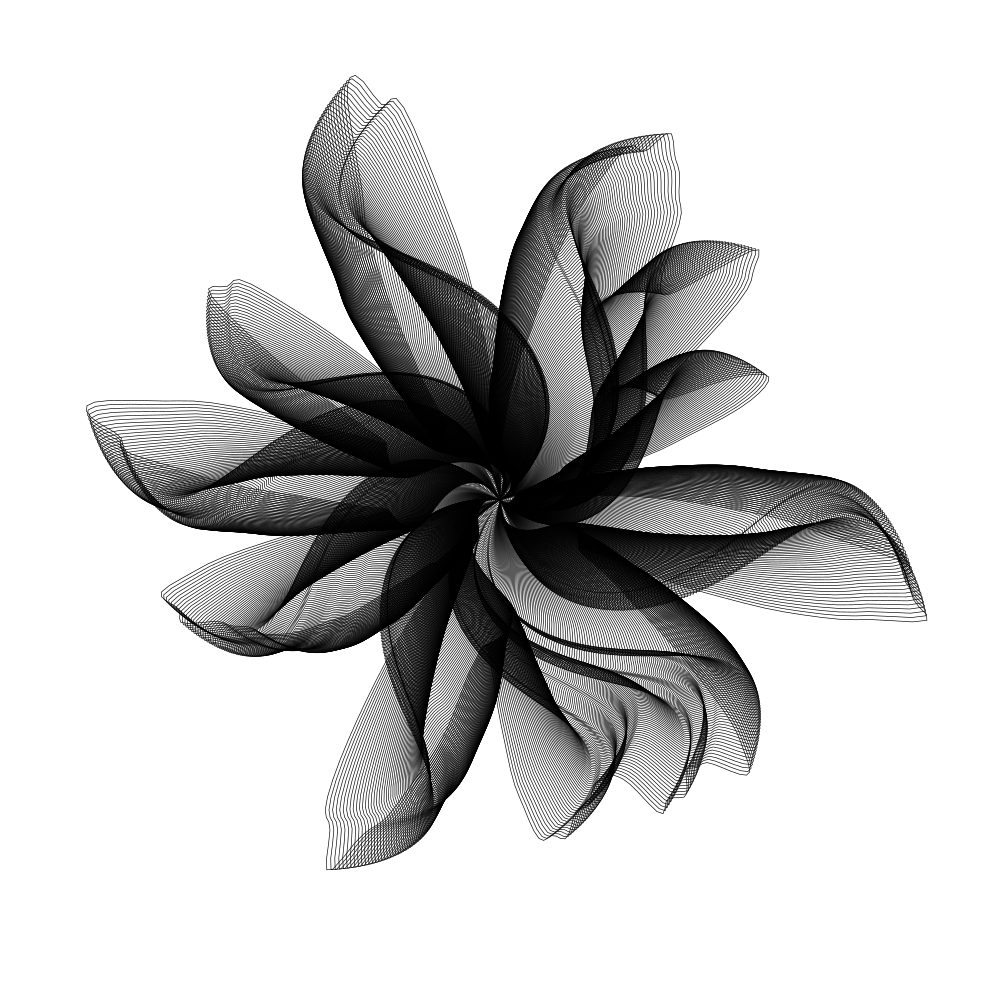

In [106]:
spin(step_size=1.2,start=1,end=250,spin_gen=sinusoid_spin_gen(324, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
 noise_r2=20, seed=34, reversed=True,n=500, scale=1, hwidth=.65)

0.182100402469166


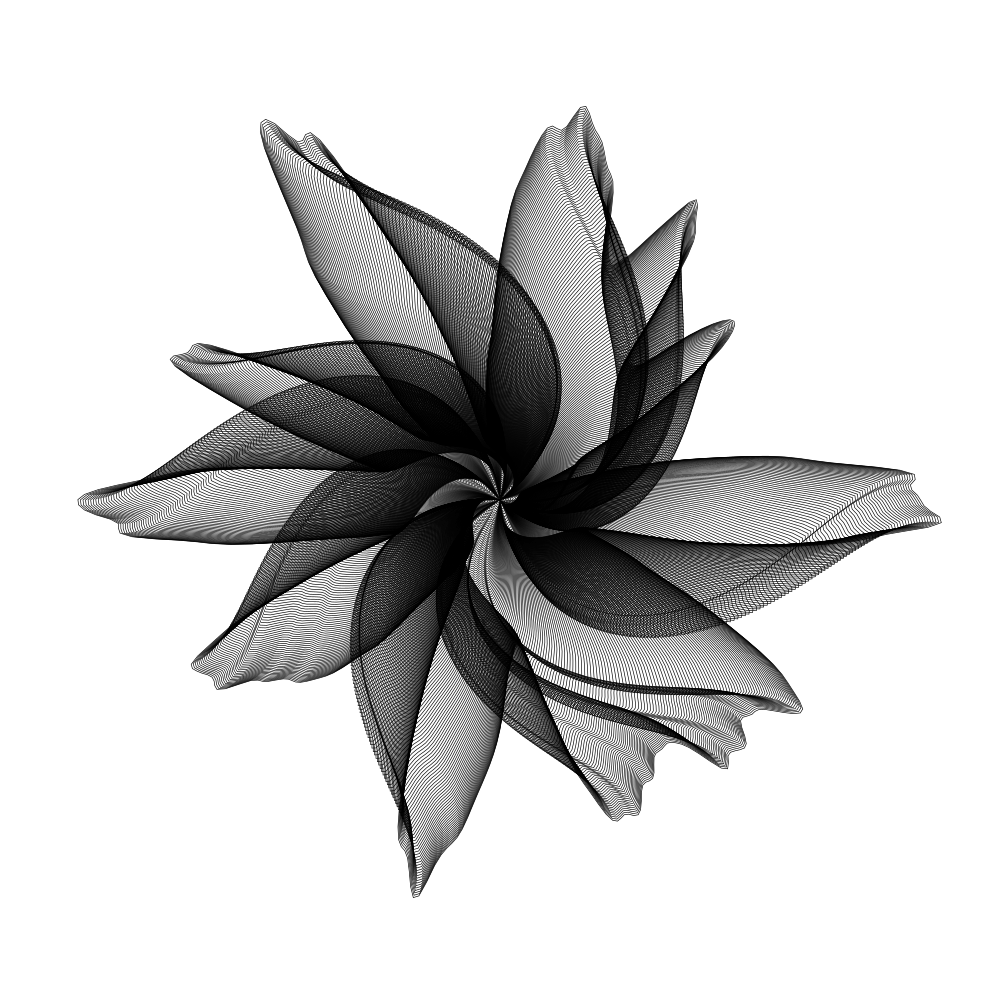

In [102]:
spin(step_size=1.5,start=1,end=250,spin_gen=sinusoid_spin_gen(324, .1), noise_coeff=1, noise_r=4, noise_coeff2=0.2, 
 noise_r2=20, seed=34, reversed=True,n=500, scale=1, hwidth=.65)